In [11]:
import pandas as pd
import json
from tqdm import tqdm
from collections import Counter

from dataset import build_vocab

In [12]:
file_path = 'data.json'
with open(file_path, 'r') as f:
    data = json.load(f)

In [10]:
file_names = []
splits = []
captions = []
tokens = []
tok_len = []
word_freq = Counter()
max_len = 100

for img in tqdm(data['images'], position=0):
    for sent in img['sentences']:
        file_names.append(img['filename'])
        captions.append(sent['raw'])
        splits.append(img['split'])
        
        ## tokens
        if len(sent['tokens']) <= max_len:
            tokens.append(sent['tokens'])
            tok_len.append(len(sent['tokens']))

KeyError: 'images'

In [ ]:
len(tok_len)

In [5]:
df = pd.DataFrame({
    'file_name': file_names,
    'split': splits,
    'caption': captions,
    'tok_len': tok_len,
    'tokens': tokens
})

In [6]:
df.head()

,file_name,split,caption,tok_len,tokens
0,1000092795.jpg,train,Two young guys with shaggy hair look at their ...,16,"[two, young, guys, with, shaggy, hair, look, a..."
1,1000092795.jpg,train,"Two young, White males are outside near many b...",9,"[two, young, white, males, are, outside, near,..."
2,1000092795.jpg,train,Two men in green shirts are standing in a yard.,10,"[two, men, in, green, shirts, are, standing, i..."
3,1000092795.jpg,train,A man in a blue shirt standing in a garden.,10,"[a, man, in, a, blue, shirt, standing, in, a, ..."
4,1000092795.jpg,train,Two friends enjoy time spent together.,6,"[two, friends, enjoy, time, spent, together]"


<AxesSubplot:>

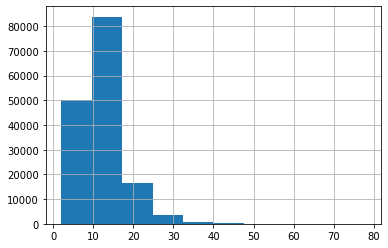

In [7]:
df.tok_len.hist()

In [8]:
df.to_json("data30.json")

In [13]:
df = pd.read_json("data.json")
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


In [14]:
df.tok_len.max()

37

In [11]:
df.iloc[0,:]['caption']

'Two young guys with shaggy hair look at their hands while hanging out in the yard.'

In [12]:
df.iloc[0,:]['tokens']

['two',
 'young',
 'guys',
 'with',
 'shaggy',
 'hair',
 'look',
 'at',
 'their',
 'hands',
 'while',
 'hanging',
 'out',
 'in',
 'the',
 'yard']

In [13]:
build_vocab('data30.json')

100%|██████████| 145000/145000 [00:00<00:00, 323220.39it/s]
